In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [24]:
data = Table.read("fba_summary_bright_north.fits")

In [25]:
data[:10]

BRICKNAME,RA,DEC,TARGETID,DESI_TARGET,BGS_TARGET,MWS_TARGET,PRIORITY_INIT,SUBPRIORITY,NUMOBS_INIT,HPXPIXEL,NUMOBS_MORE,PRIORITY,OBSCONDITIONS,NUM_OBS,AVAIL,isELG,isLRG,isQSO,isBGS_ANY,isMWS_ANY
str8,float64,float64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int32,int64,bool,bool,bool,bool,bool,bool
2167m107,216.8464346981716,-10.631225643751602,35185502982242305,2305843009213693952,0,1280,1500,0.45177296197112116,1,44961,1,1500,7,0,False,False,False,False,False,True
2167m107,216.8232802388411,-10.631043231388466,35185502982242310,2305843009213693952,0,1280,1500,0.7516987728498211,1,44961,1,1500,7,0,False,False,False,False,False,True
2167m107,216.63532410918964,-10.62976846023926,35185502982242317,2305843009213693952,0,33,1400,0.30242670477380873,1,44963,1,1400,7,0,False,False,False,False,False,True
2167m107,216.827705060818,-10.626414608342792,35185502982242349,2305843009213693952,0,33,1400,0.2959538896489107,1,44961,1,1400,7,0,False,False,False,False,False,True
2172m107,217.251602945333,-10.63274678933654,35185502990630925,2305843009213693952,0,10240,1500,0.4977574441407342,1,44961,1,1500,7,0,False,False,False,False,False,True
2172m107,217.24612406328052,-10.63117808838864,35185502990630934,2305843009213693952,0,1280,1500,0.6212916243026018,1,44961,1,1500,7,0,False,False,False,False,False,True
2172m107,217.28779297180262,-10.626230187432464,35185502990630948,2305843009213693952,0,10240,1500,0.18904632498315488,1,44961,1,1500,7,0,False,False,False,False,False,True
2172m107,217.28233708653616,-10.6256657575561,35185502990630950,2305843009213693952,0,1280,1500,0.5787504792658833,1,44961,1,1500,7,0,False,False,False,False,False,True
2172m107,217.31980782641133,-10.625185205151293,35185502990630951,2305843009213693952,0,1280,1500,0.13237245099424388,1,44961,1,1500,7,0,False,False,False,False,False,True


Text(0.5,1,'Global efficiency: 0.83')

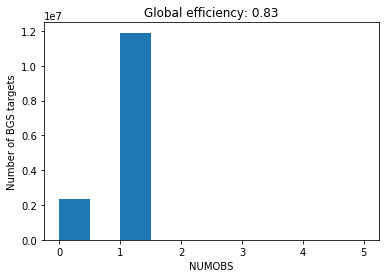

In [26]:
# Number of observations for BGS targets within reach of a fiber
ii = data['AVAIL'] & data['isBGS_ANY']
_ = plt.hist(data['NUM_OBS'][ii], bins=np.arange(6))
plt.xlabel('NUMOBS')
plt.ylabel('Number of BGS targets')

eff = np.count_nonzero(data['AVAIL'] & data['isBGS_ANY'] & (data['NUM_OBS']>0)) / np.count_nonzero(data['AVAIL'] & data['isBGS_ANY'])
plt.title("Global efficiency: {:.2f}".format(eff))

Text(0.5,1,'Global efficiency: 0.34')

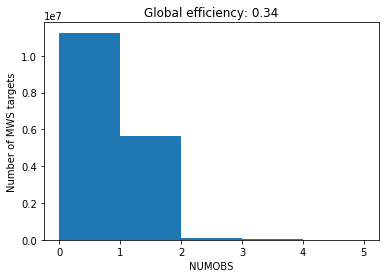

In [27]:
# Number of observations for MWS targets that were within reach of a fiber
ii = data['AVAIL'] & data['isMWS_ANY']
_ = plt.hist(data['NUM_OBS'][ii], bins=np.arange(6))
plt.xlabel('NUMOBS')
plt.ylabel('Number of MWS targets')

eff = np.count_nonzero(data['AVAIL'] & data['isMWS_ANY'] & (data['NUM_OBS']>0)) / np.count_nonzero(data['AVAIL'] & data['isMWS_ANY'])
plt.title("Global efficiency: {:.2f}".format(eff))

In [28]:
data = Table.read("fba_summary_dark_gray_north.fits")

Text(0.5,1,'Global efficiency: 0.99')

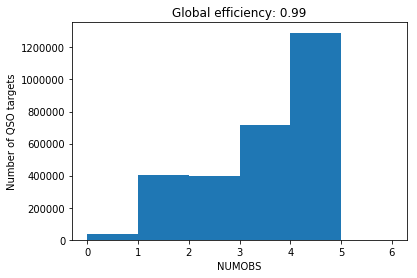

In [29]:
# Number of observations for QSOS that were within reach of a fiber
ii = data['AVAIL'] & data['isQSO']
_ = plt.hist(data['NUM_OBS'][ii], bins=np.arange(7))
plt.xlabel('NUMOBS')
plt.ylabel('Number of QSO targets')

eff = np.count_nonzero(data['AVAIL'] & data['isQSO'] & (data['NUM_OBS']>0)) / np.count_nonzero(data['AVAIL'] & data['isQSO'])
plt.title("Global efficiency: {:.2f}".format(eff))

Text(0.5,1,'Global efficiency: 0.87')

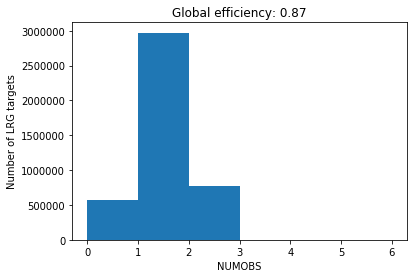

In [30]:
# Number of observations for LRGs that were within reach of a fiber
ii = data['AVAIL'] & data['isLRG']
_ = plt.hist(data['NUM_OBS'][ii], bins=np.arange(7))
plt.xlabel('NUMOBS')
plt.ylabel('Number of LRG targets')

eff = np.count_nonzero(data['AVAIL'] & data['isLRG'] & (data['NUM_OBS']>0)) / np.count_nonzero(data['AVAIL'] & data['isLRG'])
plt.title("Global efficiency: {:.2f}".format(eff))

Text(0.5,1,'Global efficiency: 0.65')

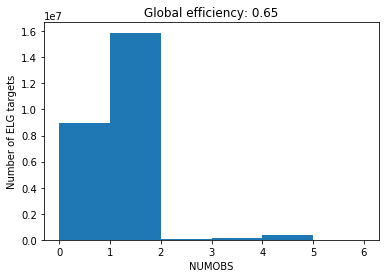

In [31]:
# Number of observations for ELG galaxies that were within reach of a fiber
ii = data['AVAIL'] & data['isELG']
_ = plt.hist(data['NUM_OBS'][ii], bins=np.arange(7))
plt.xlabel('NUMOBS')
plt.ylabel('Number of ELG targets')

eff = np.count_nonzero(data['AVAIL'] & data['isELG'] & (data['NUM_OBS']>0)) / np.count_nonzero(data['AVAIL'] & data['isELG'])
plt.title("Global efficiency: {:.2f}".format(eff))